In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

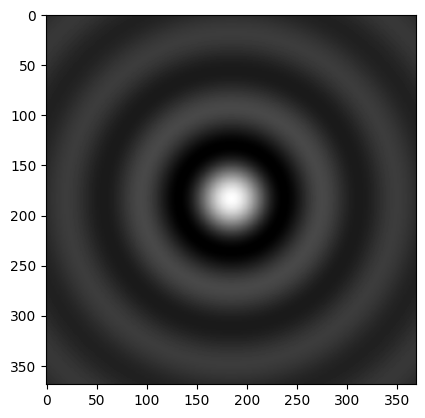

In [3]:
img = cv2.imread("images/sinc_2d.png")
plt.imshow(img)
# cv2.imshow('image',img)

# cv2.waitKey(0)

In [8]:
height, width, = img.shape[:2]
print(height, width)

369 369


In [29]:
matrix = np.ones(shape=(height,width))
print(matrix)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [31]:
def fill_main_diagonal(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if (i == j):
                matrix[i][j] = 0

    return matrix

In [39]:
new_matrix = fill_main_diagonal(matrix=matrix)
new_matrix = new_matrix.reshape((369, 369, 1))

print(new_matrix)

[[[0.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [0.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [0.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [0.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


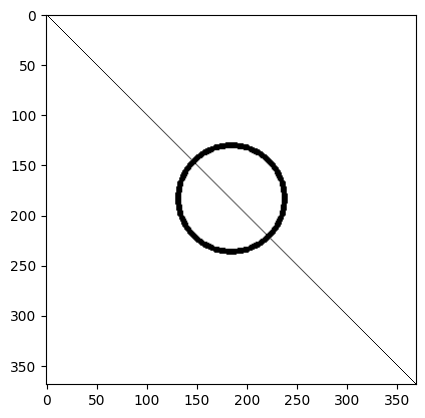

In [41]:
img_ = img * new_matrix
plt.imshow(img_)

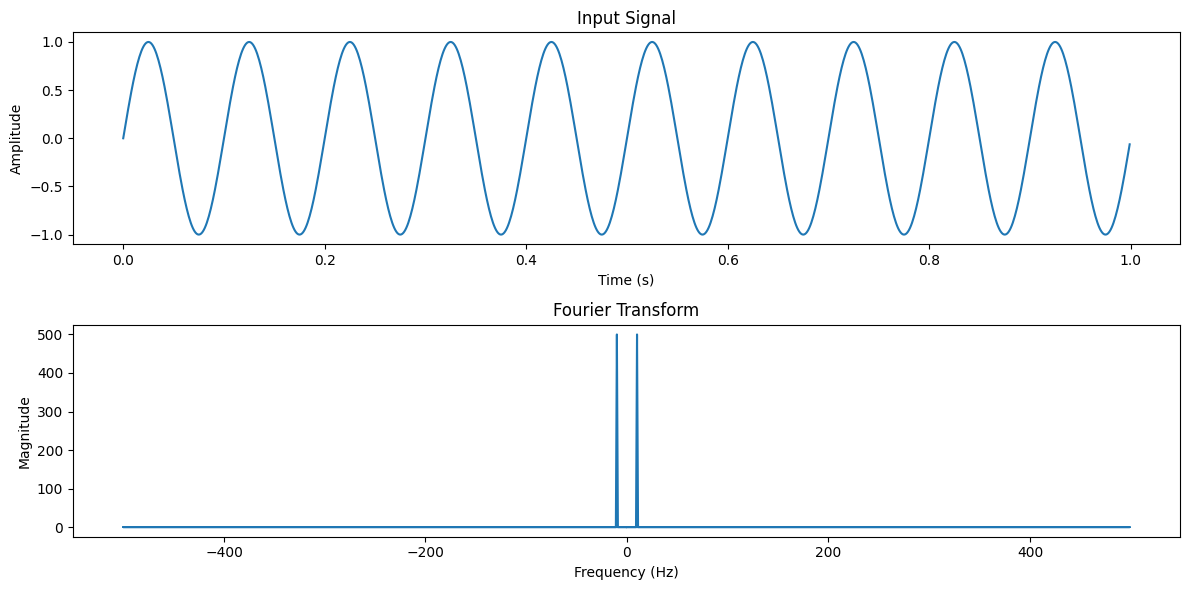

In [44]:

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
f1 = 10  # Frequency of the signal
signal = np.sin(2 * np.pi * f1 * t)  # Sinusoidal signal with frequency 10 Hz

# Compute the Fourier Transform
fourier_transform = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Plot the signal and its Fourier Transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Input Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


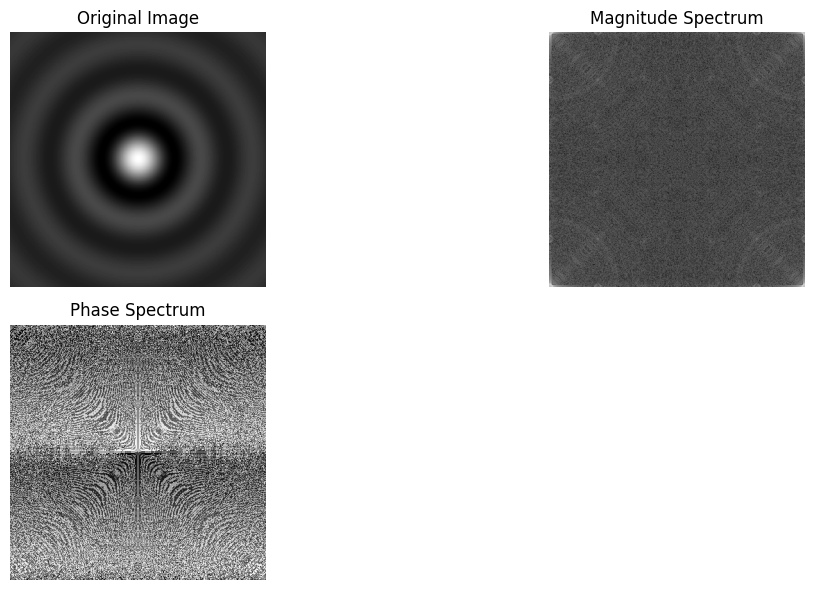

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = 'images/sinc_2d.png'  # Replace 'image.jpg' with the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Compute the 2D Fourier Transform
fourier_transform = np.fft.fft2(image_array)
# Shift the zero frequency component to the center
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Compute the magnitude spectrum (absolute value) and phase spectrum of the Fourier Transform
magnitude_spectrum = np.abs(fourier_transform)
phase_spectrum = np.angle(fourier_transform_shifted)

# Plot the original image and its Fourier Transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()